# Plotting RMS

This script should extract the data from results.p in the ./data folder

Data:
noise, heart, particle, use_heart_weights, threshold, rms, length

Jake Sganga
12/10/2015



### Note
using pandas.ipynb from CME193 as framework

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

import mpld3
# mpld3.enable_notebook()

from matplotlib import rc

sns.set_style("dark")
sns.set_context("talk")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Ascension Data

Auto generated when we call the get_position function, which returns the asynchronous data dict

In [2]:
with open( "results.p", "rb" ) as input_file:
            results = pickle.load(input_file)

with open( "results_single.p", "rb" ) as input_file:
            results_single = pickle.load(input_file)

In [3]:
# noise, heart, particle, use_heart_weights, threshold, rms, length = []
rms = []
threshold = []
run_time = []
noise = []
heart = []
hw = []
for run in results:
    this_noise, this_heart, this_particle, this_use_heart_weights, this_threshold, this_rms, this_length = run
    rms.append(this_rms)
    threshold.append(this_threshold)
    run_time.append(this_length)
    noise.append(this_noise)
    heart.append(this_heart)
    hw.append(this_use_heart_weights)
rms = np.asarray(rms)
threshold = np.asarray(threshold)
run_time = np.asarray(run_time)


noise_0, heart_0, particle_0, use_heart_weights_0, threshold_0, rms_0, run_time_0 = results_single


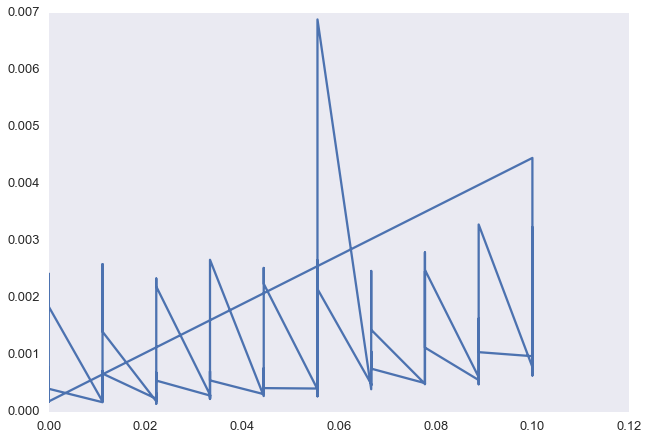

In [4]:
plt.plot(noise, rms[:,3])

In [5]:
rms_pos_mean = np.mean(rms[:,:3], axis = 1)
rms_pos_mean.shape

rms_ori_mean = np.mean(rms[:,3:], axis = 1)
rms_ori_mean.shape

(400,)

In [6]:
plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

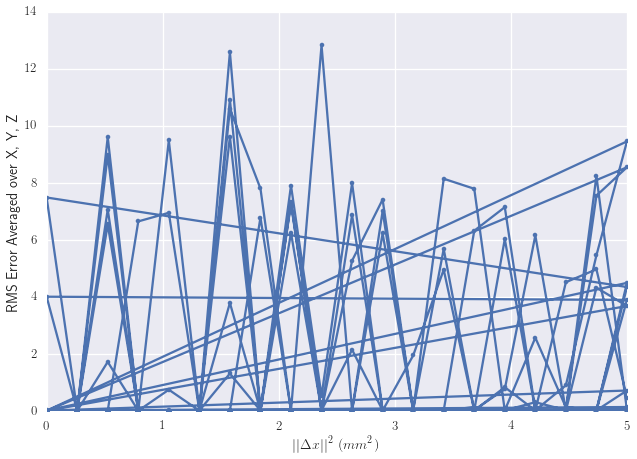

In [7]:
plt.plot(heart, rms_pos_mean,'.-')
plt.grid(True)
plt.xlabel(r'$|| \Delta x||^2 \hspace{2mm} (mm^2) $')
plt.ylabel(r'RMS Error Averaged over X, Y, Z')

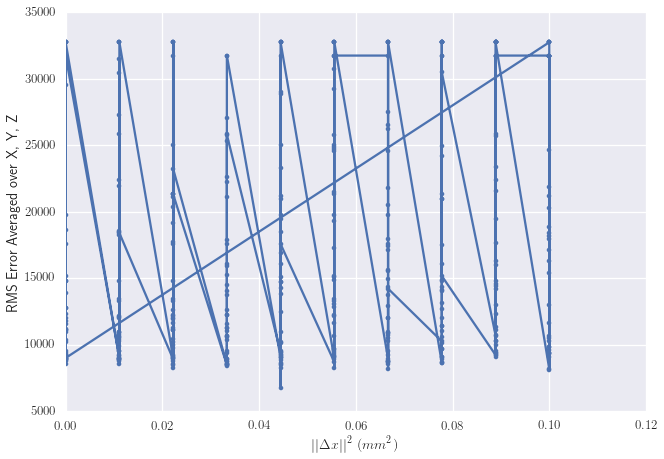

In [8]:
plt.plot(noise, run_time,'.-')
plt.grid(True)
plt.xlabel(r'$|| \Delta x||^2 \hspace{2mm} (mm^2) $')
plt.ylabel(r'RMS Error Averaged over X, Y, Z')

(-0.1, 1.0600000000000001, 0, 10.0)

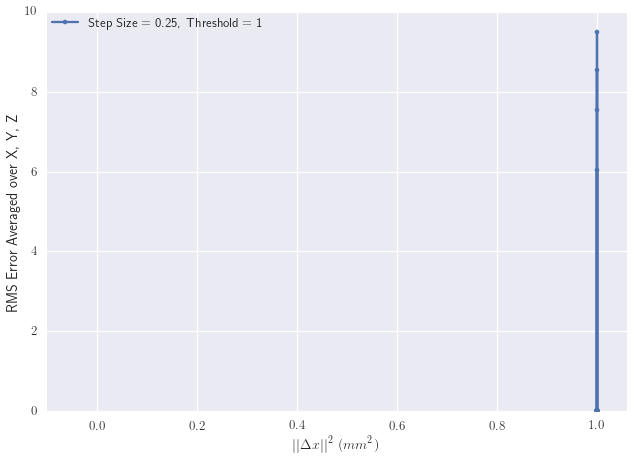

In [9]:
# [print(i, r) for i, r in enumerate(run_time)]
stop = 22
plt.plot(threshold[:stop], rms_pos_mean[:stop],'.-', label = 'Step Size = 0.25, Threshold = 1')
# plt.plot(threshold_0, np.mean(rms_0[:3]),'o',label = 'Oracle with Step Size = 1')
plt.grid(True)
plt.legend(loc=0, borderaxespad=0)
plt.xlabel(r'$|| \Delta x||^2 \hspace{2mm} (mm^2) $')
plt.ylabel(r'RMS Error Averaged over X, Y, Z')
x1,x2,y1,y2 = plt.axis()
plt.axis((-0.1,x2,0,y2))

(-0.01, 0.012, 0, 35000.0)

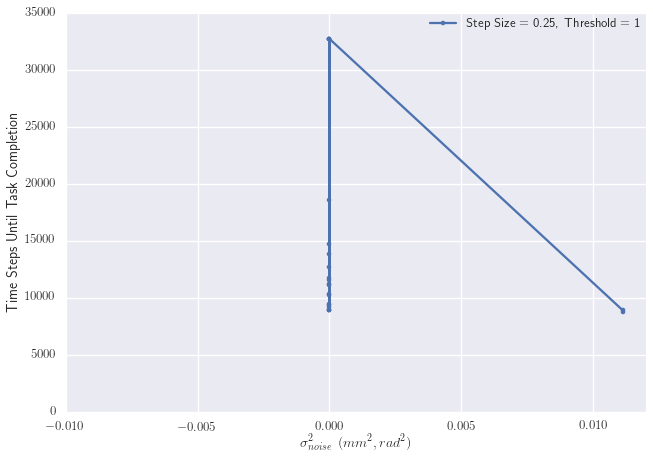

In [10]:
plt.plot(noise[:stop], run_time[:stop],'.-', label = 'Step Size = 0.25, Threshold = 1')
# plt.plot(threshold_0, run_time_0,'o',label = 'Oracle with Step Size = 1')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.xlabel(r'$\sigma_{noise}^2 \hspace{2mm} (mm^2, rad^2) $')
plt.ylabel(r'Time Steps Until Task Completion')
x1,x2,y1,y2 = plt.axis()
plt.axis((-0.01,x2,0,y2))

(-0.1, 1.0600000000000001, 0, 0.0014)

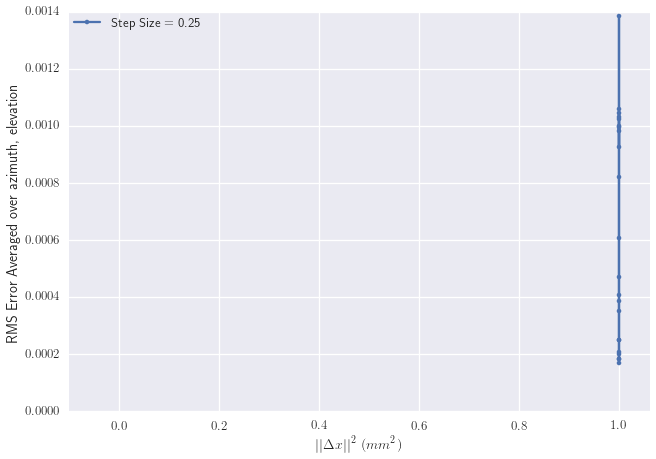

In [11]:
plt.plot(threshold[:stop], rms_ori_mean[:stop],'.-',label = 'Step Size = 0.25')
# plt.plot(threshold_0, np.mean(rms_0[3:]),'o',label = 'Oracle with Step Size = 1')
plt.grid(True)
plt.legend(loc=0, borderaxespad=0)
plt.xlabel(r'$|| \Delta x||^2 \hspace{2mm} (mm^2) $')
plt.ylabel(r'RMS Error Averaged over azimuth, elevation')
x1,x2,y1,y2 = plt.axis()
plt.axis((-0.1,x2,0,y2))